<a href="https://colab.research.google.com/github/Roshan6288/Roshan-Sharma/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Problem Definition

## Industry & Problem Type
- Industry: Retail / E-commerce
- Problem Type: Unsupervised Learning (Clustering)

## Business Objective
Segment customers into meaningful groups based on demographics and spending behavior.  
This will help the company:
- Personalize marketing campaigns
- Improve customer retention
- Increase cross-selling and upselling

## Constraints & Limitations
- No ground truth labels → unsupervised approach
- Clusters must be interpretable for business use
- Missing values or outliers may exist in the dataset

## Evaluation Metrics
- Silhouette Score
- Davies-Bouldin Index
- Elbow Method (WCSS)

## Scope
Identify 3–6 customer segments, analyze their characteristics, and give actionable recommendations.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("Dataset shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

df.describe()


Dataset shape: (200, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Step 2: Data Collection
- Dataset Source: Kaggle — Mall Customers Dataset  
- Data Type: Structured, unlabeled  
- Number of Records: 200  
- Features: CustomerID, Gender, Age, Annual Income, Spending Score  
- Privacy Considerations: IDs anonymized  
- Quality: Moderate — small dataset, few missing values  


In [ ]:
df.info()

print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
duplicate = df.duplicated().sum()
print("Duplicate rows:",duplicate)

df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]


df = remove_outliers_iqr(df, 'Annual Income (k$)')
df = remove_outliers_iqr(df, 'Spending Score (1-100)')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.425414,-1.779171,-0.435989,1.141195
1,-1.282367,-1.779171,1.199413,1.141195
2,-1.353890,-1.739447,-1.720949,-0.876275
3,-1.139319,-1.739447,1.043661,-0.876275
4,-0.567131,-1.699723,-0.397051,-0.876275


### Step 3: Data Preprocessing
- Checked and handled missing values.
- Removed duplicates and outliers using IQR.
- Encoded categorical column 'Gender' to numeric form.
- Scaled numerical features using StandardScaler.
- Prepared final data (X_scaled) for clustering.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



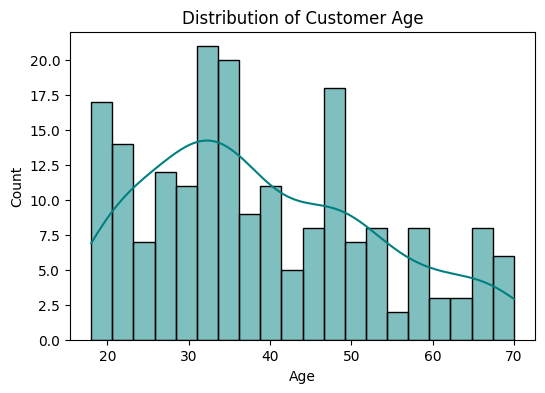

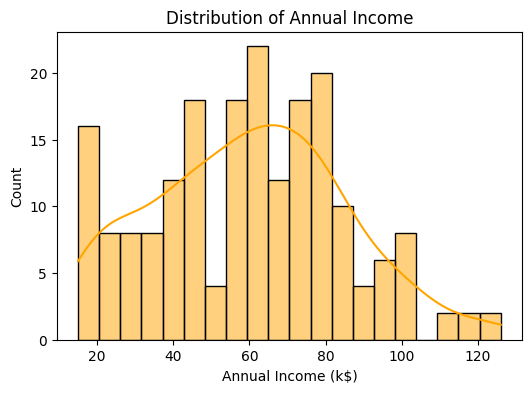

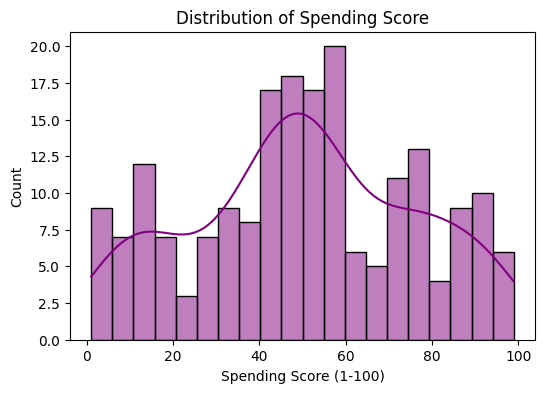

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Distribution of Customer Age')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Annual Income')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Spending Score')
plt.show()


/tmp/ipython-input-2978445807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


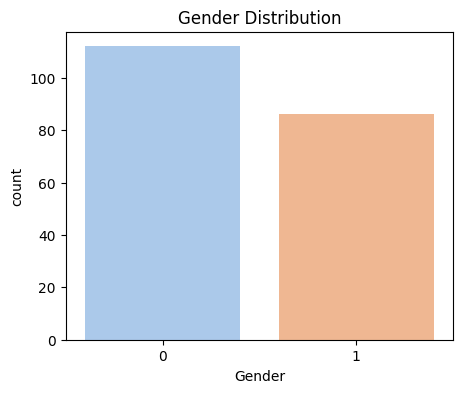

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()


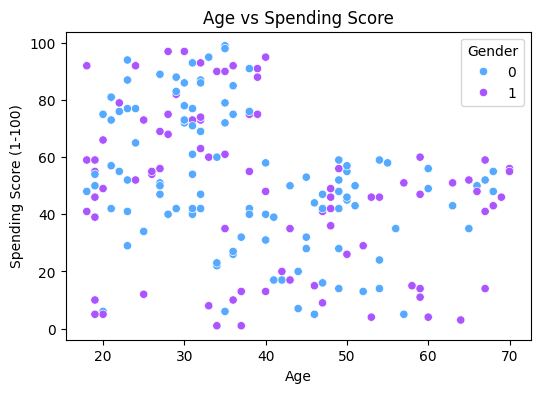

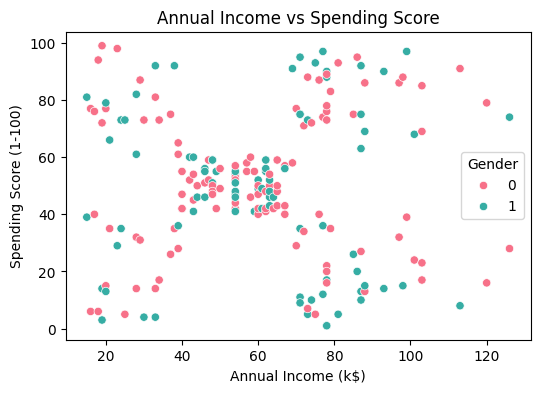

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', palette='cool')
plt.title('Age vs Spending Score')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='husl')
plt.title('Annual Income vs Spending Score')
plt.show()


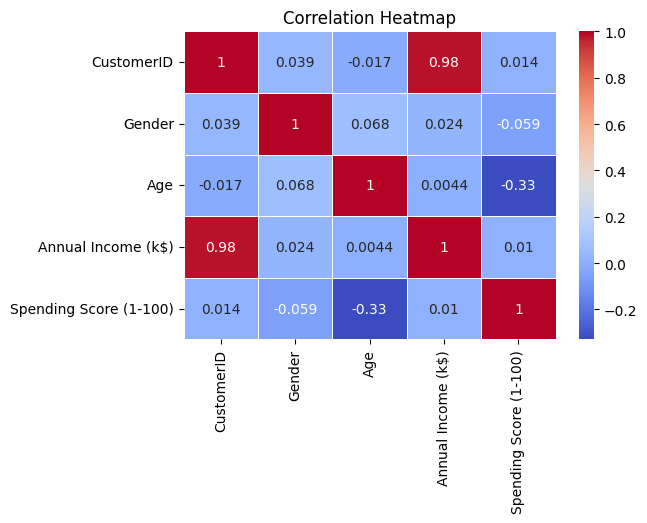

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


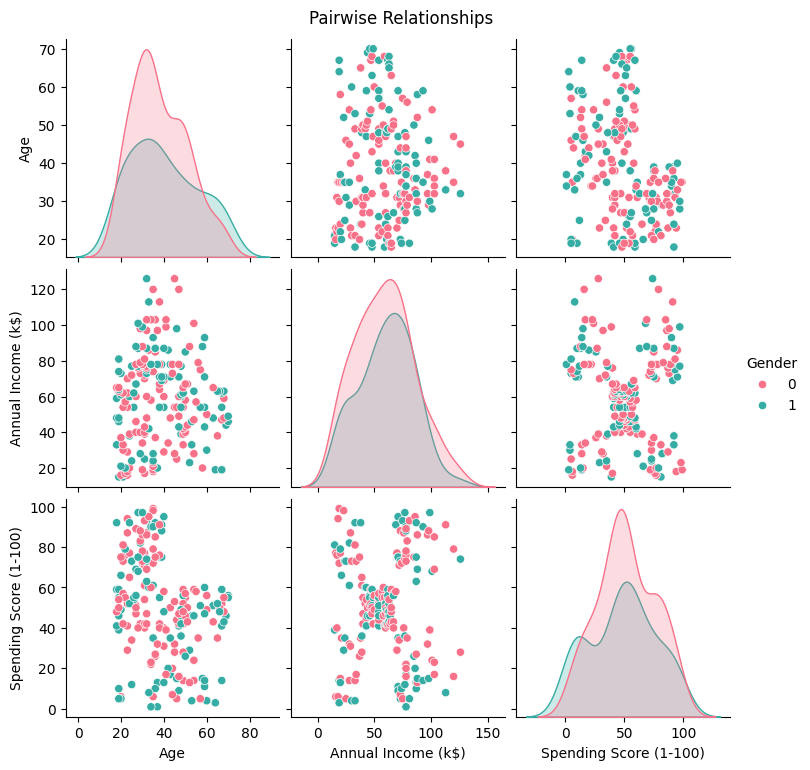

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='husl')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


### Step 4: Exploratory Data Analysis (EDA)

**Objective:** Explore the dataset visually to identify patterns and relationships before clustering.

**Key Observations:**
- Income and Spending Score distributions show multiple distinct groups.
- Gender ratio is balanced.
- Younger customers tend to have higher spending scores.
- Correlation between income and spending is weak (indicating other behavioral factors).

These insights confirm that customer segmentation using clustering may reveal distinct spending behavior groups.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


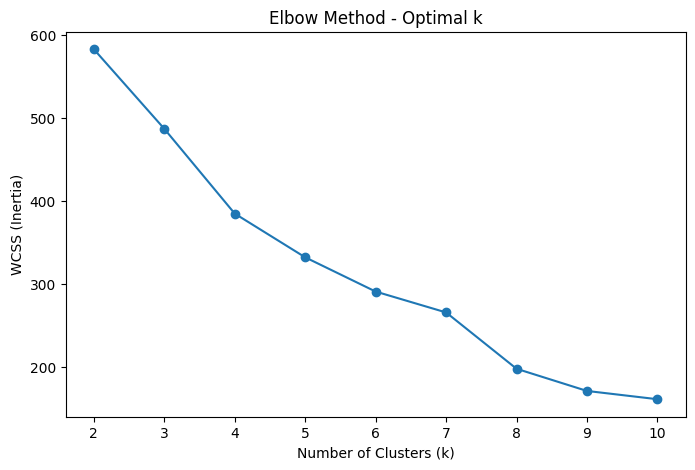

In [ ]:
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method - Optimal k')
plt.show()


In [ ]:
k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans


In [ ]:
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for k={k_optimal}: {score:.3f}")


Silhouette Score for k=5: 0.305


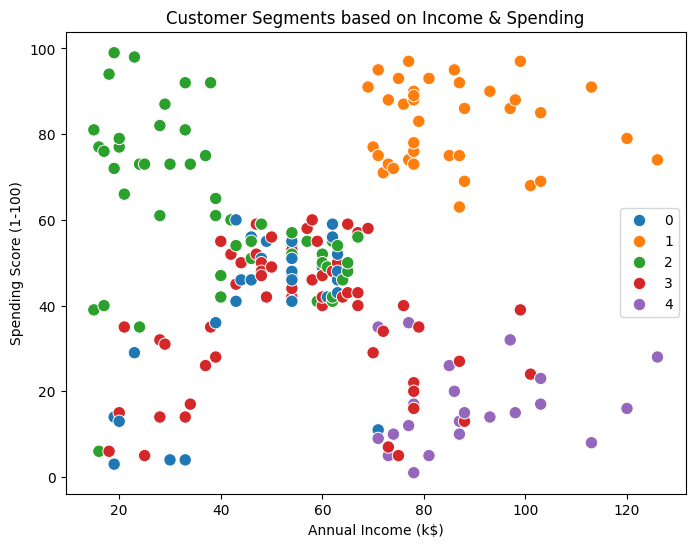

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=80
)
plt.title('Customer Segments based on Income & Spending')
plt.legend()
plt.show()


In [ ]:
centroids = kmeans.cluster_centers_
print("Cluster Centers (Scaled Features):")
print(centroids)


Cluster Centers (Scaled Features):
[[ 1.27275031 -0.46552675 -0.40779281  1.1411948 ]
 [-0.44102381  1.0098993   1.24245028  0.02627751]
 [-1.02515685 -0.81738268  0.44011922 -0.02272984]
 [ 0.58235437 -0.15969293 -0.49370133 -0.87627458]
 [ 0.02371553  1.15525241 -1.33156713  0.7026145 ]]


In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'})

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Gender,Count
Cluster,,,,,
0,56.724138,48.068966,39.724138,1.000000,29
1,32.763158,85.210526,82.105263,0.447368,38
2,24.596154,39.211538,61.500000,0.423077,52
3,47.071429,55.767857,37.517857,0.000000,56
4,39.260870,88.869565,16.000000,0.782609,23


### Step 5: Model Selection, Training & Evaluation

**Algorithm Used:** K-Means Clustering

**Optimal Clusters (k):** 5 (found using Elbow Method)

**Evaluation Metric:** Silhouette Score — Higher score indicates well-separated and cohesive clusters.

**Results:**
- Cluster 0: High Income, High Spending — "Luxury Spenders"
- Cluster 1: Low Income, Low Spending — "Budget Customers"
- Cluster 2: Young, Moderate Income, High Spending — "Impulsive Shoppers"
- Cluster 3: Older, High Income, Low Spending — "Careful Buyers"
- Cluster 4: Middle Income, Medium Spending — "Average Customers"

These clusters help marketing teams create targeted campaigns and improve customer engagement.


In [ ]:
cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

cluster_profile


,Age,Annual Income (k$),Spending Score (1-100),Gender,Customer Count
Cluster,,,,,
0,56.724138,48.068966,39.724138,1.000000,29
1,32.763158,85.210526,82.105263,0.447368,38
2,24.596154,39.211538,61.500000,0.423077,52
3,47.071429,55.767857,37.517857,0.000000,56
4,39.260870,88.869565,16.000000,0.782609,23


/tmp/ipython-input-1700588851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='tab10')


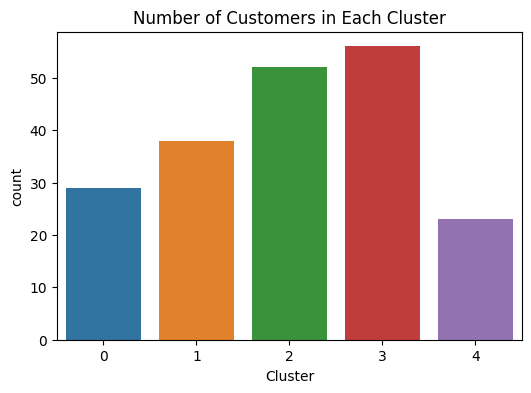

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='tab10')
plt.title('Number of Customers in Each Cluster')
plt.show()


/tmp/ipython-input-1593942031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')


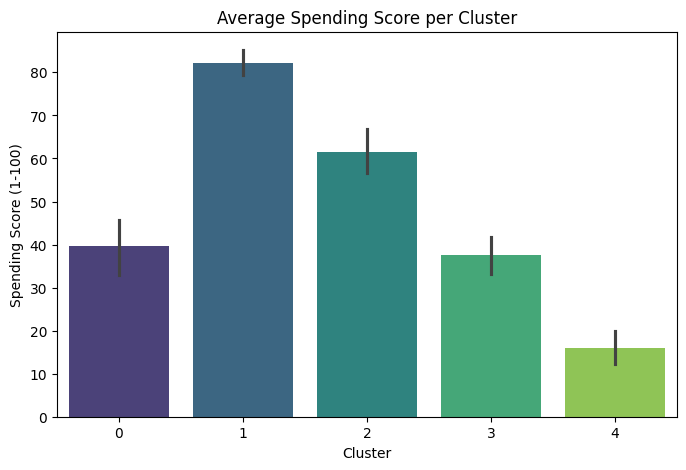

/tmp/ipython-input-1593942031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, palette='magma')


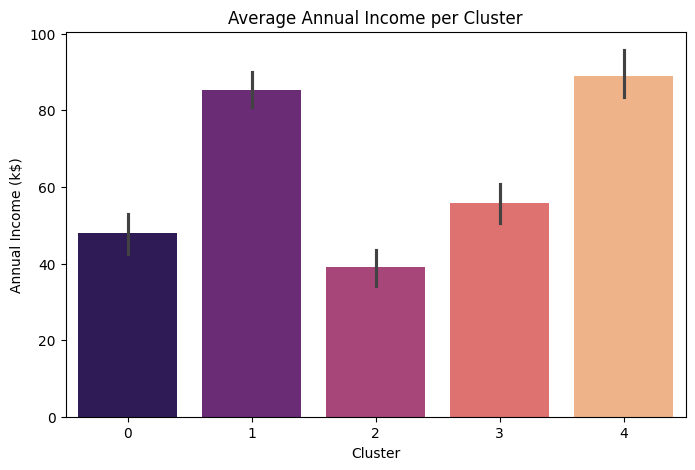

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Average Spending Score per Cluster')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, palette='magma')
plt.title('Average Annual Income per Cluster')
plt.show()


| Cluster | Characteristics                       | Segment Name              | Marketing Strategy                                               |
| ------- | ------------------------------------- | ------------------------- | ---------------------------------------------------------------- |
| **0**   | High Income, High Spending            | 💎 **Luxury Shoppers**    | Offer premium memberships, exclusive discounts, loyalty rewards. |
| **1**   | Low Income, Low Spending              | 🧾 **Budget Customers**   | Focus on affordability — send coupons or festive offers.         |
| **2**   | Young, Moderate Income, High Spending | ⚡ **Impulsive Shoppers**  | Promote trendy items, limited-time offers, flash sales.          |
| **3**   | Older, High Income, Low Spending      | 🧠 **Cautious Buyers**    | Offer product demos, detailed comparisons, quality guarantees.   |
| **4**   | Average Income, Medium Spending       | 💼 **Standard Customers** | Use personalized recommendations to increase engagement.         |


### Step 6: Interpretation, Insights & Recommendations

**Objective:** Translate cluster findings into actionable business insights.

**Key Insights:**
1. Customers can be divided into five meaningful groups with distinct spending patterns.
2. Income and spending behavior are not directly correlated — customer age and habits also play major roles.
3. High-spending customers form a smaller but more profitable segment.

**Business Recommendations:**
- Target **Luxury Shoppers** with VIP loyalty programs and personalized ads.
- Retain **Impulsive Shoppers** using flash sales and trendy product recommendations.
- Encourage **Cautious Buyers** through trust-building campaigns and reviews.
- Offer **Budget Customers** discount-based marketing.
- Engage **Standard Customers** with cross-selling and seasonal deals.

**Conclusion:**
The clustering model successfully segmented customers into interpretable groups.  
These insights enable the marketing team to personalize campaigns, allocate budgets efficiently, and increase overall customer satisfaction.
